In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


X = np.array([[1,2], [2,3], [3,4], [4,5], [5,6], [6,7], [7,9]])
X

array([[1, 2],
       [2, 3],
       [3, 4],
       [4, 5],
       [5, 6],
       [6, 7],
       [7, 9]])

In [8]:
cluster_centers = np.array([[1,1],[2,2],[3,3]])
cluster_centers

array([[1, 1],
       [2, 2],
       [3, 3]])

In [15]:
p = X[:, :, np.newaxis]
print(p.shape)
p

(7, 2, 1)


array([[[1],
        [2]],

       [[2],
        [3]],

       [[3],
        [4]],

       [[4],
        [5]],

       [[5],
        [6]],

       [[6],
        [7]],

       [[7],
        [9]]])

In [14]:
q = cluster_centers.T[np.newaxis, :, :]
print(q.shape)
q

(1, 2, 3)


array([[[1, 2, 3],
        [1, 2, 3]]])

In [18]:
r = (p - q)**2
r

array([[[ 0,  1,  4],
        [ 1,  0,  1]],

       [[ 1,  0,  1],
        [ 4,  1,  0]],

       [[ 4,  1,  0],
        [ 9,  4,  1]],

       [[ 9,  4,  1],
        [16,  9,  4]],

       [[16,  9,  4],
        [25, 16,  9]],

       [[25, 16,  9],
        [36, 25, 16]],

       [[36, 25, 16],
        [64, 49, 36]]])

In [19]:
s = r.sum(axis=1)
s

array([[  1,   1,   5],
       [  5,   1,   1],
       [ 13,   5,   1],
       [ 25,  13,   5],
       [ 41,  25,  13],
       [ 61,  41,  25],
       [100,  74,  52]])

In [20]:
# k-means

In [33]:
%matplotlib inline

import numpy as np
import itertools

class KMeans:
    def __init__(self, n_clusters, max_iter=1000, random_seed=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = np.random.RandomState(random_seed)
    
    def fit(self, X):
        cycle = itertools.cycle(range(self.n_clusters))
        self.labels_ = np.fromiter(itertools.islice(cycle, X.shape[0]), dtype=np.int)
        self.random_state.shuffle(self.labels_)
        labels_prev = np.zeros(X.shape[0])
        count = 9
        self.cluster_centers_ = np.zeros((self.n_clusters, X.shape[1]))
        while (not (self.labels_ == labels_prev).all() and count < self.max_iter):
            for i in range(self.n_clusters):
                XX = X[self.labels_ == i, :]
                self.cluster_centers_[i, :] = XX.mean(axis=0)
            dist = ((X[:, :, np.newaxis] - self.cluster_centers_.T[np.newaxis, :, :]) ** 2).sum(axis=1)
            labels_prev = self.labels_
            self.labels_ = dist.argmin(axis=1)
            count += 1

    def  predict(self, X):
        dist = ((X[:, :, np.newaxis] - self.cluster_centers_.T[np.newaxis, :, :]) ** 2).sum(axis=1)
        labels = dist.argmin(axis=1)
        return labels

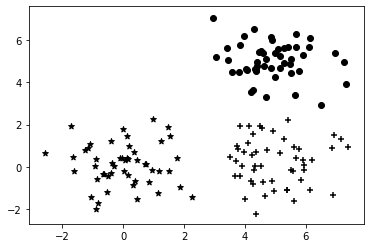

In [35]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
points1 = np.random.randn(50, 2)
points2  = np.random.randn(50, 2) + np.array([5, 0])
points3 = np.random.randn(50, 2) + np.array([5,5])

points = np.r_[points1, points2, points3]
np.random.shuffle(points)

model = KMeans(3)
model.fit(points)

markers = ["+","*","o"]
for i in range(3):
    p = points[model.labels_ == i, :]
    plt.scatter(p[:, 0], p[:, 1], color='k', marker=markers[i])

plt.show()